## 0. Preliminary
    0.1 Import
    0.2 Functions
        0.2.1 nan_volumetry
        0.2.1 pair_plot
        0.2.2 new_features_GFA
        0.2.3 new_features_ENG
        0.2.4 cramers_V & cramersV_matrix
    0.3 Read_csv

## 1. Analyze
    1.1 df.shape
    1.2 nan_volumetry
    1.3 df.dtypes.sort_values()
    1.4 df.dtypes.value_counts()
    1.5 df.describe()
    1.6 df.duplicated().sum()
    1.7 df.nunique().sort_values()


## 2. Df_clean

    2.1 Non Residential Buildings
    2.2 Chose of Features
        2.2.1 df.columns
        2.2.2 chose of features
        2.2.3 nan_volumetry
        2.3.4 df.dtypes.sort_values()
    2.3 Outliers
        2.3.1 drop using 'CompilanceStatus' & 'Outlier' features
    2.4 Drop nunique() ==1
    2.5 Drop negatives values
    2.6 Df.sort_index()


## 3. Property type and GFA
    3.1 Creation of the new features
    3.2 Analyze and corretion of GFA features
        3.2.1 Nan_volumetry & describe
        3.2.2 Nan corresponding between PropertyUseType and GFA
        3.2.3 df['PropertyGFATotal_%']==0
    3.3 Incoherences
    3.4 Conclusions
    

## 4. Energy types and ENG
    4.1 Creation of the new features
    4.2 Analyze and correction of ENG features
    
## 5. Features regroup    
    5.1 Neighborhood
        5.1.1 duplicates
        5.1.2 regroup
    5.2 PrimaryPropertyType
    5.3 YearBuilt
        5.3.1 pair_plot(df.loc[:,['YearBuilt','ENERGYSTARScore']])
        5.3.2 regroup
        5.3.3 pie
    5.4 Drop not strucutal features
    
## 6. Features analysis
    6.1 Quantitative features
        6.1.1 histplot
        6.1.2 normaltest
        6.1.3 skewtest
        6.1.4 kurtosistest
    6.2 Qualitative features
        6.2.1 pieplot
        6.2.2 df.drop(columns='BuildingType')


## 7. Encoding
    7.1 One hot encoding
    7.2 Target encoding
    
## 8. Skew
    8.1 Log - square root - cube root
    8.2 Boxcox
    8.3 Skew transform
    
## 9. Correlation
    9.1 Pearson correlation matrix
        9.1.1 df.corr.abs()
        9.1.2 drop feature with correlation > 0.7
        9.1.3 plot heatmap
    9.2 Cramer's V correlation matrix

## 10. Save DataFrame



## 0. Preliminary

### 0.1 Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import math
import scipy.stats as stats

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')


### 0.2 Funtions

In [2]:
def nan_volumetry(df, title='NaN Volumetry', theshold = -1):
    """
    Plot a barh graph of NaN percentage values of every columns
    
    """
    per_1 = ((df.isna().mean().round(4) * 100).sort_values())
    per_1 = per_1.loc[per_1.gt(theshold)]
    plt.rcParams["figure.figsize"] =(10,len(per_1)/3)
    f, ax = plt.subplots()
    for i,item in enumerate(zip(per_1.keys(),per_1.values)):
        ax.barh(item[0], item[1], label = item[0])
        ax.text(1.5,i-0.2, str(item[1])+'%')
    plt.title(title, fontsize=20)
    plt.margins(0)
    plt.xlabel('Percentage')
    plt.ylabel('Columns')
    plt.grid(axis='x')
    plt.show()

In [3]:
def pair_plot(df):
    tic = time.process_time()
    g = sns.pairplot(df, diag_kind="kde", corner=False)
    g.map_lower(sns.kdeplot, levels=4, color="0")
    toc= time.process_time()
    print('Running time: '+str(round((toc-tic)/(60),2))+' min')
    plt.show()
    plt.close('all')

In [4]:
def new_features_GFA(df):
    df['OtherLargestPropertyUseTypeGFA'] = df['PropertyGFATotal'] - (df[[GFA[i] for i in [1,2,3]]].sum(axis=1))
    
    df[GFA_perc] = np.nan
    
    df[GFA_perc[0]] = ((df[[GFA[i] for i in [1,2,3]]].sum(axis=1))/df[GFA[0]])*100
    for i in [1,2,3,4]:
        df[GFA_perc[i]] = (df[GFA[i]]/df['PropertyGFATotal'])*100
    
    df.loc[df[GFA_perc[0]]==100, GFA+GFA_perc] = df.loc[df[GFA_perc[0]]==100, GFA+GFA_perc].fillna(0)
    df.loc[df[GFA_perc[0]]==100, Property_type] = df.loc[df[GFA_perc[0]]==100, Property_type].fillna('None')    

In [5]:
def new_features_ENG(df):
#     df['OtherLargestPropertyUseTypeGFA'] = df['PropertyGFATotal'] - (df[[GFA[i] for i in [1,2,3]]].sum(axis=1))
    
    df[ENG_perc] = np.nan
    
    df[ENG_perc[0]] = ((df[[ENG[i] for i in [1,2,3]]].sum(axis=1))/df[ENG[0]])*100
    for i in [1,2,3]:
        df[ENG_perc[i]] = (df[ENG[i]]/df[ENG[0]])*100

In [6]:
# ##### chi2_contingecy :
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

from scipy.stats import chi2_contingency
def cramers_V(var1,var2) :
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    return (stat/(obs*mini))

def cramersV_matrix(data):
    rows= []
    for var1 in data.columns:
        col = []
        for var2 in data.columns :
            cramers =cramers_V(data[var1], data[var2]) # Cramer's V test
            col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
        rows.append(col)
    cramers_results = np.array(rows)
    cramers_data = pd.DataFrame(cramers_results, columns = data.columns, index =data.columns)
    
    plt.close('all')
    plt.figure(figsize=(len(cramers_data),len(cramers_data)))
    mask = np.zeros_like(cramers_data, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(cramers_data, mask=mask,vmin=0., vmax=1, square=True)
    plt.show()
    plt.close('all')
    return cramers_data

### 0.3 Read_csv

In [7]:
df = pd.read_csv('2016_Building_Energy_Benchmarking.csv')
df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


## 1. Analyze

In [8]:
df.shape

(3376, 46)

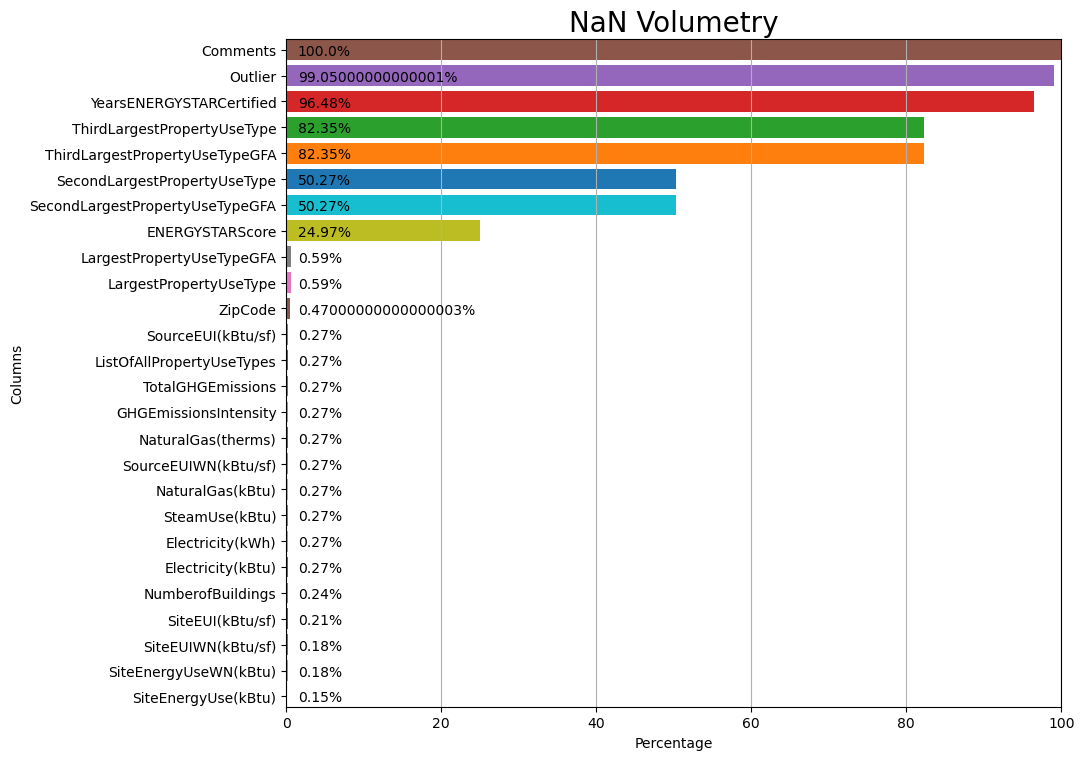

In [9]:
nan_volumetry(df, theshold = 0)

In [10]:
df.dtypes.sort_values()

DefaultData                           bool
OSEBuildingID                        int64
DataYear                             int64
PropertyGFABuilding(s)               int64
PropertyGFAParking                   int64
PropertyGFATotal                     int64
NumberofFloors                       int64
CouncilDistrictCode                  int64
YearBuilt                            int64
ENERGYSTARScore                    float64
SiteEUI(kBtu/sf)                   float64
SiteEUIWN(kBtu/sf)                 float64
SourceEUI(kBtu/sf)                 float64
SiteEnergyUse(kBtu)                float64
ThirdLargestPropertyUseTypeGFA     float64
SiteEnergyUseWN(kBtu)              float64
SteamUse(kBtu)                     float64
Electricity(kWh)                   float64
Electricity(kBtu)                  float64
NaturalGas(therms)                 float64
NaturalGas(kBtu)                   float64
Comments                           float64
SourceEUIWN(kBtu/sf)               float64
SecondLarge

In [11]:
df.dtypes.value_counts()

float64    22
object     15
int64       8
bool        1
dtype: int64

In [12]:
df.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,3376.000000,3.376000e+03,3.356000e+03,1679.000000,596.000000,2533.000000,3369.000000,3370.000000,3367.000000,3367.000000,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,8001.526066,8.683201e+04,7.917764e+04,28444.075817,11738.675166,67.918674,54.732116,57.033798,134.232848,137.783932,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,32326.723928,2.079398e+05,2.017034e+05,54392.917928,29331.199286,26.873271,56.273124,57.163330,139.287554,139.109807,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,0.000000,2.775600e+04,2.509475e+04,5000.000000,2239.000000,53.000000,27.900000,29.400000,74.699997,78.400002,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,0.000000,4.321600e+04,3.989400e+04,10664.000000,5043.000000,75.000000,38.599998,40.900002,96.199997,101.099998,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,0.000000,8.427625e+04,7.620025e+04,26640.000000,10138.750000,90.000000,60.400002,64.275002,143.899994,148.349998,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,834.400024,834.400024,2620.000000,2620.000000,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


In [13]:
df.duplicated().sum()

0

In [14]:
df.nunique().sort_values()

Comments                              0
DataYear                              1
State                                 1
City                                  1
DefaultData                           2
Outlier                               2
ComplianceStatus                      4
CouncilDistrictCode                   7
BuildingType                          8
NumberofBuildings                    17
Neighborhood                         19
PrimaryPropertyType                  24
ThirdLargestPropertyUseType          44
SecondLargestPropertyUseType         50
NumberofFloors                       50
ZipCode                              55
LargestPropertyUseType               56
YearsENERGYSTARCertified             65
ENERGYSTARScore                     100
YearBuilt                           113
SteamUse(kBtu)                      131
ListOfAllPropertyUseTypes           466
PropertyGFAParking                  496
ThirdLargestPropertyUseTypeGFA      501
GHGEmissionsIntensity               511


## 2. Df_clean

### 2.1 Non Residential Buildings

In [15]:
# I need only the Non Residential Buildings

print('BuildingType : \n',df['BuildingType'].unique())
print('PrimaryPropertyType : \n',df['PrimaryPropertyType'].unique())
df_shape = df.shape
df = df.loc[df['BuildingType'].isin(['NonResidential', 
                                     'Nonresidential COS', 
                                     'SPS-District K-12', 
                                     'Campus', 
                                     'Nonresidential WA'
                                    ])
           ]

'old df.shape :', df_shape, 'new df.shape :', df.shape

BuildingType : 
 ['NonResidential' 'Nonresidential COS' 'Multifamily MR (5-9)'
 'SPS-District K-12' 'Campus' 'Multifamily LR (1-4)'
 'Multifamily HR (10+)' 'Nonresidential WA']
PrimaryPropertyType : 
 ['Hotel' 'Other' 'Mid-Rise Multifamily' 'Mixed Use Property' 'K-12 School'
 'University' 'Small- and Mid-Sized Office' 'Self-Storage Facility'
 'Warehouse' 'Large Office' 'Senior Care Community' 'Medical Office'
 'Retail Store' 'Hospital' 'Residence Hall' 'Distribution Center'
 'Worship Facility' 'Low-Rise Multifamily' 'Supermarket / Grocery Store'
 'Laboratory' 'Refrigerated Warehouse' 'Restaurant'
 'High-Rise Multifamily' 'Office']


('old df.shape :', (3376, 46), 'new df.shape :', (1668, 46))

### 2.2 Chose of Features

In [16]:
# display(df.columns)
# df.drop(columns=['PropertyName', 
#                  'Address',
#                  'TaxParcelIdentificationNumber', 
#                  'ListOfAllPropertyUseTypes',
#                  'YearsENERGYSTARCertified'], 
#         inplace=True)

In [17]:
# Chose of features
df = df.loc[:,['OSEBuildingID', # ID
                           'Neighborhood','Latitude','Longitude', 
                           # I probably will keep just latitude and longitud  
                           
                           'BuildingType', 
                           'PrimaryPropertyType',
                           'LargestPropertyUseType', 
                           'LargestPropertyUseTypeGFA',
                           'SecondLargestPropertyUseType', 
                           'SecondLargestPropertyUseTypeGFA',
                           'ThirdLargestPropertyUseType', 
                           'ThirdLargestPropertyUseTypeGFA',
                           # probably PrimaryPropertyType are subsets of BuildingType
                           
                           'NumberofBuildings','NumberofFloors', 'PropertyGFATotal', #floor area 
                           # Maybe i can create a unique feature ... or maybe just keep PropertyGFATotal    
                           
                           'YearBuilt', 
 
                           'ENERGYSTARScore', #####
                           
                           'SiteEUI(kBtu/sf)',#Site Energy Use Intensity (EUI) is a property's Site Energy Use divided by its gross floor area. 
                                           #Site Energy Use is the annual amount of all the energy consumed by the property on-site, as reported on utility bills. 
                                           #Site EUI is measured in thousands of British thermal units (kBtu) per square foot.
                           
                           'SiteEUIWN(kBtu/sf)',#Weather Normalized (WN) Site Energy Use Intensity (EUI) is a property's WN Site Energy divided by its gross floor area (in square feet). 
                                               #WN Site Energy is the Site Energy Use the property would have consumed during 30-year average weather conditions. 
                                               #WN Site EUI is measured in measured in thousands of British thermal units (kBtu) per square foot.
                           
                           'SourceEUI(kBtu/sf)',#Source Energy Use Intensity (EUI) is a property's Source Energy Use divided by its gross floor area. 
                                               #Source Energy Use is the annual energy used to operate the property, including losses from generation, transmission, & distribution. 
                                               #Source EUI is measured in thousands of British thermal units (kBtu) per square foot.
                           
                           'SourceEUIWN(kBtu/sf)',#Weather Normalized (WN) Source Energy Use Intensity (EUI) is a property's WN Source Energy divided by its gross floor area. 
                                               #WN Source Energy is the Source Energy Use the property would have consumed during 30-year average weather conditions. 
                                               #WN Source EUI is measured in measured in thousands of British thermal units (kBtu) per square foot.
                           
                           'SiteEnergyUse(kBtu)',#The annual amount of energy consumed by the property from all sources of energy. 
                           
                           'SiteEnergyUseWN(kBtu)',#The annual amount of energy consumed by the property from all sources of energy, adjusted to what the property would have consumed during 30-year average weather conditions. 
                           
                           'SteamUse(kBtu)',#The annual amount of district steam consumed by the property on-site, measured in thousands of British thermal units (kBtu).
                           
                           #'Electricity(kWh)',#The annual amount of electricity consumed by the property on-site, including electricity purchased from the grid and generated by onsite renewable systems, measured in kWh.
                           'Electricity(kBtu)',#The annual amount of electricity consumed by the property on-site, including electricity purchased from the grid and generated by onsite renewable systems, measured in thousands of British thermal units (kBtu).
                           
                           'NaturalGas(therms)',#The annual amount of utility-supplied natural gas consumed by the property, measured in therms.
                           
                           'NaturalGas(kBtu)', #The annual amount of utility-supplied natural gas consumed by the property, measured in thousands of British thermal units (kBtu).
                           
                           'DefaultData', #The property used default data for at least one property characteristic.
                           
                           'ComplianceStatus','Outlier', 
                           
                           'TotalGHGEmissions',#The total amount of greenhouse gas emissions, 
                                           #including carbon dioxide, methane, and nitrous oxide gases released into the atmosphere as a result of energy consumption at the property, 
                                           #measured in metric tons of carbon dioxide equivalent. 
                                           #This calculation uses a GHG emissions factor from Seattle CIty Light's portfolio of generating resources. 
                                           #This uses Seattle City Light's 2015 emissions factor of 52.44 lbs CO2e/MWh until the 2016 factor is available. 
                                           #Enwave steam factor = 170.17 lbs CO2e/MMBtu. 
                                           #Gas factor sourced from EPA Portfolio Manager = 53.11 kg CO2e/MBtu., 
                           
                           'GHGEmissionsIntensity'#Total Greenhouse Gas Emissions divided by property's gross floor area, 
                                               #measured in kilograms of carbon dioxide equivalent per square foot. 
                                               #This calculation uses a GHG emissions factor from Seattle City Light's portfolio of generating resources
                          ]]


In [18]:
# # definition of features_kBtu list
# features_kBtu = []
# for x in df.columns:
#     if 'kBtu' in x:
#         features_kBtu.append(x)

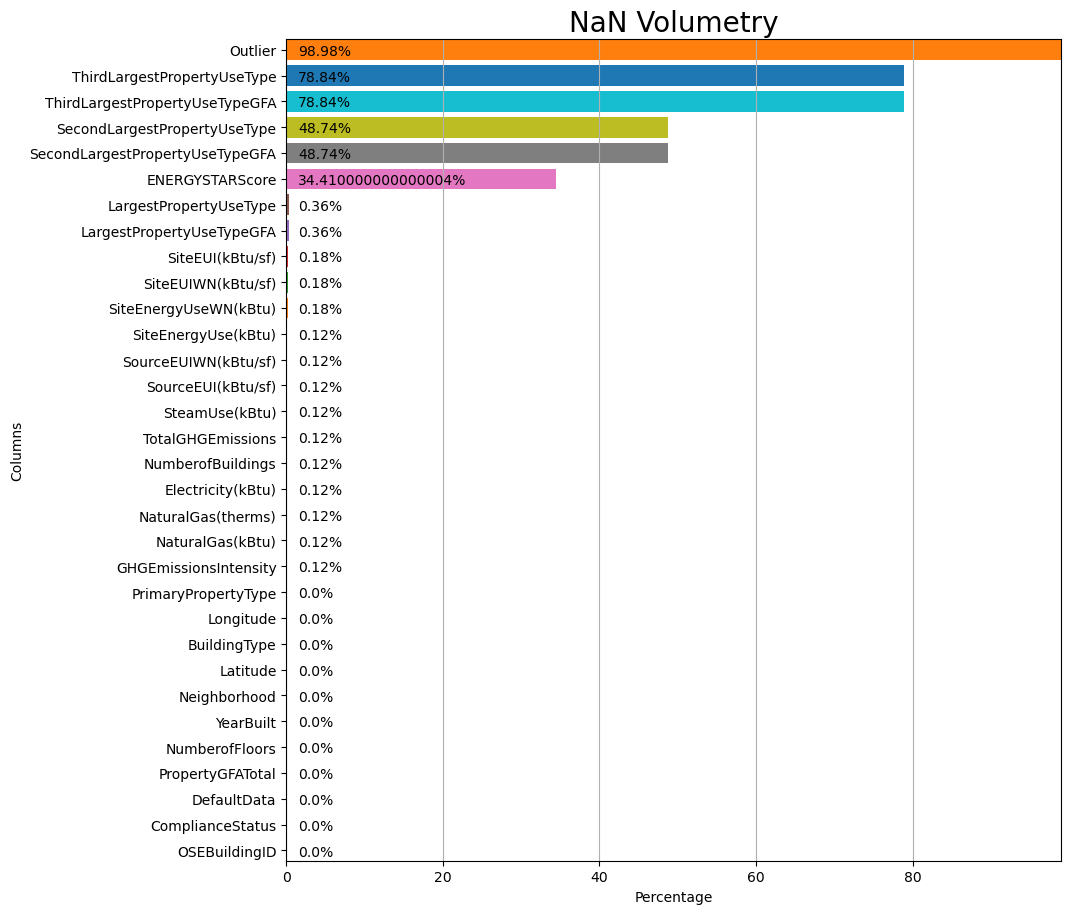

In [19]:
nan_volumetry(df)

In [20]:
df.dtypes.sort_values()

DefaultData                           bool
OSEBuildingID                        int64
PropertyGFATotal                     int64
NumberofFloors                       int64
YearBuilt                            int64
SiteEUIWN(kBtu/sf)                 float64
NaturalGas(kBtu)                   float64
NaturalGas(therms)                 float64
Electricity(kBtu)                  float64
SteamUse(kBtu)                     float64
SiteEnergyUseWN(kBtu)              float64
SiteEnergyUse(kBtu)                float64
SourceEUIWN(kBtu/sf)               float64
SourceEUI(kBtu/sf)                 float64
SiteEUI(kBtu/sf)                   float64
ENERGYSTARScore                    float64
GHGEmissionsIntensity              float64
Latitude                           float64
Longitude                          float64
NumberofBuildings                  float64
ThirdLargestPropertyUseTypeGFA     float64
SecondLargestPropertyUseTypeGFA    float64
LargestPropertyUseTypeGFA          float64
TotalGHGEmi

### 2.3 Outliers

ComplianceStatus
Compliant                       1548
Error - Correct Default Data      88
Missing Data                      14
Non-Compliant                     18
dtype: int64

Outlier
High outlier     2
Low outlier     15
dtype: int64

ComplianceStatus              Outlier     
Error - Correct Default Data  Low outlier      2
Non-Compliant                 High outlier     2
                              Low outlier     13
dtype: int64

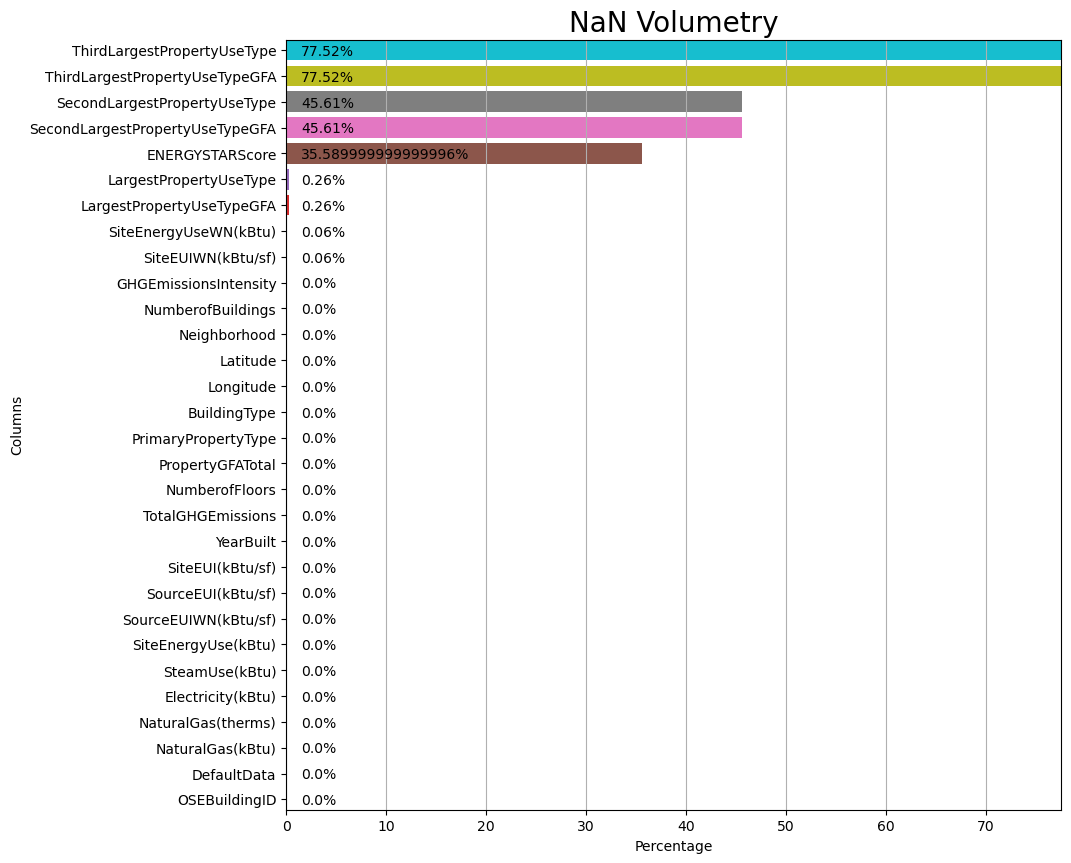

In [21]:
display(df.groupby('ComplianceStatus').size())
display(df.groupby('Outlier').size())
display(df.groupby(['ComplianceStatus','Outlier']).size())

df = df.loc[df['ComplianceStatus']=='Compliant']
df = df.drop(columns=['ComplianceStatus','Outlier'])
nan_volumetry(df)

### 2.4 Drop nunique() ==1

In [22]:
print(df.nunique()<=1)
for col in df.columns:
    if len(df[col].unique()) <= 1:
        df.drop(columns = col,inplace=True)

OSEBuildingID                      False
Neighborhood                       False
Latitude                           False
Longitude                          False
BuildingType                       False
PrimaryPropertyType                False
LargestPropertyUseType             False
LargestPropertyUseTypeGFA          False
SecondLargestPropertyUseType       False
SecondLargestPropertyUseTypeGFA    False
ThirdLargestPropertyUseType        False
ThirdLargestPropertyUseTypeGFA     False
NumberofBuildings                  False
NumberofFloors                     False
PropertyGFATotal                   False
YearBuilt                          False
ENERGYSTARScore                    False
SiteEUI(kBtu/sf)                   False
SiteEUIWN(kBtu/sf)                 False
SourceEUI(kBtu/sf)                 False
SourceEUIWN(kBtu/sf)               False
SiteEnergyUse(kBtu)                False
SiteEnergyUseWN(kBtu)              False
SteamUse(kBtu)                     False
Electricity(kBtu

### 2.5 Drop negatives values

In [23]:
df.select_dtypes(exclude=['object']).lt(0).sum()

OSEBuildingID                         0
Latitude                              0
Longitude                          1548
LargestPropertyUseTypeGFA             0
SecondLargestPropertyUseTypeGFA       0
ThirdLargestPropertyUseTypeGFA        0
NumberofBuildings                     0
NumberofFloors                        0
PropertyGFATotal                      0
YearBuilt                             0
ENERGYSTARScore                       0
SiteEUI(kBtu/sf)                      0
SiteEUIWN(kBtu/sf)                    0
SourceEUI(kBtu/sf)                    0
SourceEUIWN(kBtu/sf)                  1
SiteEnergyUse(kBtu)                   0
SiteEnergyUseWN(kBtu)                 0
SteamUse(kBtu)                        0
Electricity(kBtu)                     1
NaturalGas(therms)                    0
NaturalGas(kBtu)                      0
TotalGHGEmissions                     1
GHGEmissionsIntensity                 1
dtype: int64

In [24]:
x = df.select_dtypes(exclude=['object']).columns.tolist()
x.remove('Longitude')
for col in x:
    ind = df.loc[(df[col]<0)].index
    df.drop(index = ind, inplace=True)
df.select_dtypes(exclude=['object']).lt(0).sum()   
    

OSEBuildingID                         0
Latitude                              0
Longitude                          1547
LargestPropertyUseTypeGFA             0
SecondLargestPropertyUseTypeGFA       0
ThirdLargestPropertyUseTypeGFA        0
NumberofBuildings                     0
NumberofFloors                        0
PropertyGFATotal                      0
YearBuilt                             0
ENERGYSTARScore                       0
SiteEUI(kBtu/sf)                      0
SiteEUIWN(kBtu/sf)                    0
SourceEUI(kBtu/sf)                    0
SourceEUIWN(kBtu/sf)                  0
SiteEnergyUse(kBtu)                   0
SiteEnergyUseWN(kBtu)                 0
SteamUse(kBtu)                        0
Electricity(kBtu)                     0
NaturalGas(therms)                    0
NaturalGas(kBtu)                      0
TotalGHGEmissions                     0
GHGEmissionsIntensity                 0
dtype: int64

### 2.6 Df.sort_index()

In [25]:
df = df.sort_index()

## 3. Property type and GFA

### 3.1 Creation of the new features

In [26]:
# I create a lists of features I am interested in and plot the NaN volumetry
GFA = ['PropertyGFATotal',
       'LargestPropertyUseTypeGFA', 
       'SecondLargestPropertyUseTypeGFA', 
       'ThirdLargestPropertyUseTypeGFA',
       'OtherLargestPropertyUseTypeGFA'
      ]
GFA_perc = ['PropertyGFATotal_%',
            'LargestPropertyUseTypeGFA_%', 
            'SecondLargestPropertyUseTypeGFA_%', 
            'ThirdLargestPropertyUseTypeGFA_%',
            'OtherLargestPropertyUseTypeGFA_%'
           ]
Property_type = ['PrimaryPropertyType',
                 'LargestPropertyUseType',
                 'SecondLargestPropertyUseType',
                 'ThirdLargestPropertyUseType'
                ]
# In the function if datas are consistent i replace NaN values with Zero
new_features_GFA(df)

### 3.2 Analyze and correction of GFA features

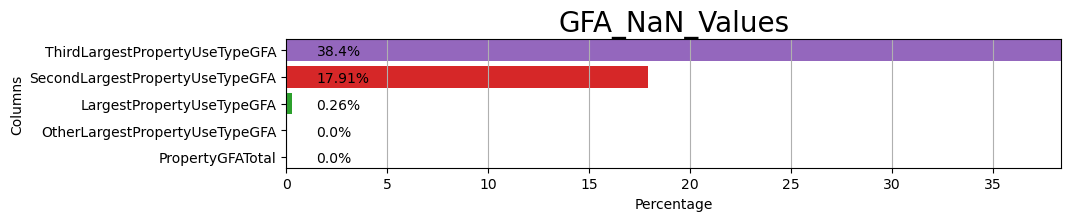

,PropertyGFATotal,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,OtherLargestPropertyUseTypeGFA
count,1.547000e+03,1.543000e+03,1270.000000,953.000000,1.547000e+03
mean,1.213769e+05,9.997920e+04,24094.789998,5477.033997,-1.498265e+03
std,3.063884e+05,2.855909e+05,56900.373717,23498.935090,5.788570e+04
min,1.128500e+04,5.656000e+03,0.000000,0.000000,-1.361871e+06
25%,2.884250e+04,2.501050e+04,0.000000,0.000000,0.000000e+00
50%,4.813900e+04,4.195800e+04,5290.000000,0.000000,0.000000e+00
75%,1.077510e+05,9.206750e+04,18000.000000,3700.000000,1.549000e+03
max,9.320156e+06,9.320156e+06,639931.000000,459748.000000,5.290520e+05


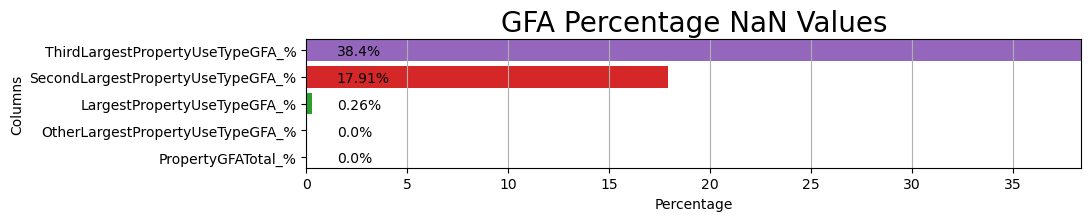

,PropertyGFATotal_%,LargestPropertyUseTypeGFA_%,SecondLargestPropertyUseTypeGFA_%,ThirdLargestPropertyUseTypeGFA_%,OtherLargestPropertyUseTypeGFA_%
count,1547.000000,1543.000000,1270.000000,953.000000,1547.000000
mean,101.265549,86.131871,15.884345,3.759926,-1.265549
std,29.625129,31.259432,17.979070,7.782102,29.625129
min,0.000000,18.646908,0.000000,0.000000,-542.684902
25%,97.740540,67.298635,0.000000,0.000000,0.000000
50%,100.000000,94.049904,11.063439,0.000000,0.000000
75%,100.000000,100.000000,28.330447,4.158825,2.259460
max,642.684902,642.684902,145.205417,92.909354,100.000000


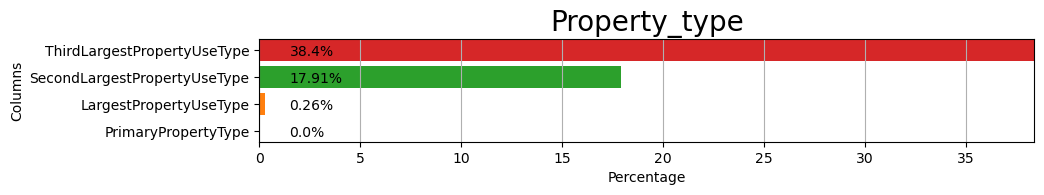

,PrimaryPropertyType,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType
count,1547,1543,1270,953
unique,21,55,48,40
top,Small- and Mid-Sized Office,Office,None,None
freq,285,484,428,605


In [27]:
nan_volumetry(df[GFA], title='GFA_NaN_Values')
display(df[GFA].describe())

nan_volumetry(df[GFA_perc], title='GFA Percentage NaN Values')
display(df[GFA_perc].describe()) 

nan_volumetry(df[Property_type], title='Property_type') 
display(df[Property_type].describe())

In [28]:
for i in [0,1,2,3]:
    print(len(df.loc[(df[Property_type[i]].isna() & df[GFA[i]].notna())]))
    print(len(df.loc[(df[Property_type[i]].notna() & df[GFA[i]].isna())]))
'''If PropertyUseType is NaN the corrisponding GFA is also NaN, and viceversa'''


0
0
0
0
0
0
0
0


'If PropertyUseType is NaN the corrisponding GFA is also NaN, and viceversa'

In [29]:
display(df.loc[df[GFA_perc[0]]==0])
df.loc[df[GFA_perc[0]]==0, GFA[1]] = df.loc[df[GFA_perc[0]]==0, GFA[0]]
new_features_GFA(df)
display(df.loc[df[GFA_perc[0]]==0])

,OSEBuildingID,Neighborhood,Latitude,Longitude,BuildingType,PrimaryPropertyType,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,NumberofBuildings,NumberofFloors,PropertyGFATotal,YearBuilt,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,OtherLargestPropertyUseTypeGFA,PropertyGFATotal_%,LargestPropertyUseTypeGFA_%,SecondLargestPropertyUseTypeGFA_%,ThirdLargestPropertyUseTypeGFA_%,OtherLargestPropertyUseTypeGFA_%
353,496,BALLARD,47.66838,-122.39310,NonResidential,Self-Storage Facility,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2,111445,1946,NaN,47.799999,51.000000,103.000000,106.400002,5.697472e+06,6.076957e+06,0.0,3007514.0,26899.582030,2689958.0,163.83,1.47,111445.0,0.0,NaN,NaN,NaN,100.0
1147,21103,DOWNTOWN,47.61203,-122.34165,NonResidential,Hotel,NaN,NaN,NaN,NaN,NaN,NaN,1.0,8,61721,1910,93.0,52.200001,53.500000,150.399994,154.399994,2.897080e+06,2.968430e+06,0.0,2534592.0,3624.875244,362488.0,36.92,0.60,61721.0,0.0,NaN,NaN,NaN,100.0
2414,25568,LAKE UNION,47.64747,-122.34086,NonResidential,Small- and Mid-Sized Office,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4,48350,2008,45.0,72.199997,74.699997,226.600006,234.600006,3.168131e+06,3.280956e+06,0.0,3168131.0,0.000000,0.0,22.09,0.46,48350.0,0.0,NaN,NaN,NaN,100.0
2459,25711,DOWNTOWN,47.59697,-122.32474,NonResidential,Restaurant,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3,28800,1913,NaN,31.200001,32.500000,62.000000,62.799999,8.999242e+05,9.358332e+05,0.0,402907.0,4970.169922,497017.0,29.21,1.01,28800.0,0.0,NaN,NaN,NaN,100.0


,OSEBuildingID,Neighborhood,Latitude,Longitude,BuildingType,PrimaryPropertyType,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,NumberofBuildings,NumberofFloors,PropertyGFATotal,YearBuilt,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,OtherLargestPropertyUseTypeGFA,PropertyGFATotal_%,LargestPropertyUseTypeGFA_%,SecondLargestPropertyUseTypeGFA_%,ThirdLargestPropertyUseTypeGFA_%,OtherLargestPropertyUseTypeGFA_%


### 3.3 Incoherences

In [30]:
for i in [0,1,2,3]:
    x = df.loc[df[GFA[i]]<df[GFA[i+1]]]
    if len(x)>0:
        print(GFA[i]+' < '+GFA[i+1]+' in '+str(len(x))+' rows')

PropertyGFATotal < LargestPropertyUseTypeGFA in 180 rows
ThirdLargestPropertyUseTypeGFA < OtherLargestPropertyUseTypeGFA in 97 rows


In [31]:
print('PropertyGFATotal_% > 105 in ' +str(len(df.loc[df[GFA_perc[0]]>=105]))+' buildings')
print('PropertyGFATotal_% < 95 in ' +str(len(df.loc[df[GFA_perc[0]]<=95]))+' buildings')

PropertyGFATotal_% > 105 in 228 buildings
PropertyGFATotal_% < 95 in 313 buildings


In [32]:
len(df)

1547

### 3.4 Conclusions

In [33]:
''' GFA features are inconsistent and I chose to don't keep them''' 

df.drop(columns=['LargestPropertyUseTypeGFA', 
                 'SecondLargestPropertyUseTypeGFA', 
                 'ThirdLargestPropertyUseTypeGFA',
                 'OtherLargestPropertyUseTypeGFA',
                 'PropertyGFATotal_%',
                 'LargestPropertyUseTypeGFA_%', 
                 'SecondLargestPropertyUseTypeGFA_%', 
                 'ThirdLargestPropertyUseTypeGFA_%',
                 'OtherLargestPropertyUseTypeGFA_%',
                 'LargestPropertyUseType',
                 'SecondLargestPropertyUseType',
                 'ThirdLargestPropertyUseType'
                ], inplace=True)

## 4. Energy types and ENG

### 4.1 Creation of the new features

In [34]:
ENG = ['SiteEnergyUse(kBtu)',
       'SteamUse(kBtu)',
       'Electricity(kBtu)',
       'NaturalGas(kBtu)'
      ]
ENG_perc = ['SiteEnergyUse(kBtu)_%',
            'SteamUse(kBtu)_%',
            'Electricity(kBtu)_%',
            'NaturalGas(kBtu)_%'    
           ]
new_features_ENG(df)

### 4.2 Analyze and correction of ENG features

In [35]:
df[ENG+ENG_perc].describe()

,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),SiteEnergyUse(kBtu)_%,SteamUse(kBtu)_%,Electricity(kBtu)_%,NaturalGas(kBtu)_%
count,1.547000e+03,1.547000e+03,1.547000e+03,1.547000e+03,1547.000000,1547.000000,1547.000000,1547.000000
mean,8.865564e+06,5.515393e+05,6.144885e+06,2.039614e+06,99.708293,2.252525,70.047211,27.408556
std,3.131505e+07,5.720334e+06,2.151708e+07,9.713668e+06,4.330781,9.407663,26.350727,26.402403
min,5.713320e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.253035e+06,0.000000e+00,7.320410e+05,0.000000e+00,99.999982,0.000000,49.028369,0.000000
50%,2.735166e+06,0.000000e+00,1.747974e+06,4.902260e+05,99.999991,0.000000,70.741251,23.217854
75%,7.298149e+06,0.000000e+00,5.265402e+06,1.530936e+06,100.000000,0.000000,99.998812,48.935926
max,8.739237e+08,1.349435e+08,6.570744e+08,2.979090e+08,123.734551,76.698738,100.000342,100.000000


In [36]:
len(df.loc[df[ENG_perc[0]]>101]) , len(df.loc[df[ENG_perc[0]]<99])

(3, 19)

In [37]:
df.drop(df.loc[df[ENG_perc[0]]>101].index, inplace=True)
df.drop(df.loc[df[ENG_perc[0]]<99].index, inplace=True)
len(df)

1525

In [38]:
df[ENG_perc].describe()

,SiteEnergyUse(kBtu)_%,SteamUse(kBtu)_%,Electricity(kBtu)_%,NaturalGas(kBtu)_%
count,1525.000000,1525.000000,1525.000000,1525.000000
mean,99.999591,2.108971,70.219995,27.670625
std,0.014466,9.134812,26.321659,26.443417
min,99.435800,0.000000,0.000000,0.000000
25%,99.999982,0.000000,49.136821,0.000000
50%,99.999991,0.000000,71.017542,23.833650
75%,100.000000,0.000000,99.999790,49.279076
max,100.000342,76.698738,100.000342,100.000000


## 5. Features regroup

### 5.1 Neighborhoods

In [39]:
print('Old Neighborhoods :\n',df['Neighborhood'].sort_values().unique())
df.loc[df['Neighborhood']=='Ballard', 'Neighborhood' ] = 'BALLARD'
df.loc[df['Neighborhood']=='Central', 'Neighborhood' ] = 'CENTRAL'
df.loc[df['Neighborhood']=='North', 'Neighborhood' ] = 'NORTH'
df.loc[df['Neighborhood']=='Northwest', 'Neighborhood' ]= 'NORTHWEST'
df.loc[df['Neighborhood']=='Delridge', 'Neighborhood' ]= 'DELRIDGE'
print('\nNew Neighborhoods :\n',df['Neighborhood'].sort_values().unique())

Old Neighborhoods :
 ['BALLARD' 'Ballard' 'CENTRAL' 'Central' 'DELRIDGE'
 'DELRIDGE NEIGHBORHOODS' 'DOWNTOWN' 'Delridge' 'EAST' 'GREATER DUWAMISH'
 'LAKE UNION' 'MAGNOLIA / QUEEN ANNE' 'NORTH' 'NORTHEAST' 'NORTHWEST'
 'North' 'Northwest' 'SOUTHEAST' 'SOUTHWEST']

New Neighborhoods :
 ['BALLARD' 'CENTRAL' 'DELRIDGE' 'DELRIDGE NEIGHBORHOODS' 'DOWNTOWN' 'EAST'
 'GREATER DUWAMISH' 'LAKE UNION' 'MAGNOLIA / QUEEN ANNE' 'NORTH'
 'NORTHEAST' 'NORTHWEST' 'SOUTHEAST' 'SOUTHWEST']


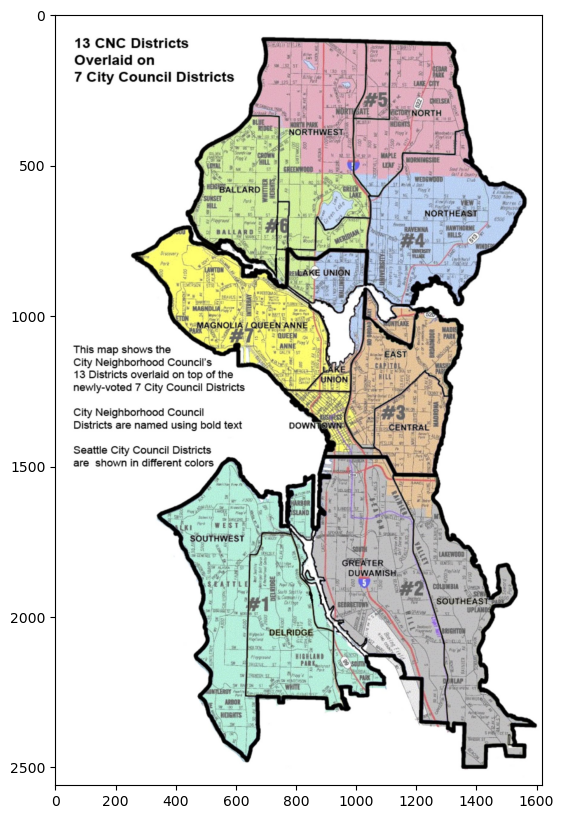

In [40]:
from matplotlib import image
img = image.imread("Seattle_districts.jpg")
plt.figure(figsize=(20,10))
plt.imshow(img)
plt.show()
plt.close('all')

regroup_Neighborhood = {"District_#1_#2" : ['DELRIDGE', 'DELRIDGE NEIGHBORHOODS', 'SOUTHWEST', 'GREATER DUWAMISH', 'SOUTHEAST'],
                        "District_#4_#5" : ['NORTHEAST', 'LAKE UNION', 'NORTH', 'NORTHWEST'],
                        "District_#3_#6_#7" : ['CENTRAL', 'EAST','BALLARD', 'MAGNOLIA / QUEEN ANNE'],
                        "DOWNTOWN" : ["DOWNTOWN"]
                       }

df['Districts_Neighborhood'] = np.nan
for key, values in regroup_Neighborhood.items():
    df.loc[df['Neighborhood'].isin(values), 'Districts_Neighborhood' ] = key
    

df['Districts_Neighborhood_target'] = df.groupby('Neighborhood')['OSEBuildingID'].transform('nunique') 
df.drop(columns='Neighborhood', inplace=True)

### 5.2 PrimaryPropertyType

In [41]:
print('Old PrimaryPropertyType :\n',df['PrimaryPropertyType'].sort_values().unique())

prim_prop_type = {'LOUNGES' : ['K-12 School', 
                              'University',
                              'Laboratory',
                              'School', 
                              'Worship Facility',
                              'Residence',
                              'Residence Hall', 
                              'Senior Care Community',
                              'Low-Rise Multifamily',
                              'Restaurant',
                              'Hotel'],
                  'OFFICE' : ['Large Office',
                              'Small- and Mid-Sized Office',
                              'Medical Office'],
                  'STORE_WAREHOUSE' : ['Supermarket / Grocery Store',
                                       'Retail Store',
                                       'Store', 
                                       'Warehouse',
                                       'Refrigerated Warehouse',
                                       'Distribution Center',
                                       'Self-Storage Facility'],
                  'HOTEL_RESTAURANT_RESIDENCE' : ['Residence',
                                                  'Residence Hall', 
                                                  'Senior Care Community',
                                                  'Low-Rise Multifamily',
                                                  'Restaurant',
                                                  'Hotel'],
                  'OTHER' : ['Other', 'Hospital', 'Mixed Use Property']
                 }

df['PrimaryPropertyType_target'] = df['PrimaryPropertyType']
for key, values in prim_prop_type.items():
    df.loc[df['PrimaryPropertyType'].isin(values), 'PrimaryPropertyType' ] = key
    
df['PrimaryPropertyType_target'] =  df.groupby('PrimaryPropertyType_target')['OSEBuildingID'].transform('nunique')
print('\nNew PrimaryPropertyType :\n',df['PrimaryPropertyType'].sort_values().unique())

Old PrimaryPropertyType :
 ['Distribution Center' 'Hospital' 'Hotel' 'K-12 School' 'Laboratory'
 'Large Office' 'Low-Rise Multifamily' 'Medical Office'
 'Mixed Use Property' 'Other' 'Refrigerated Warehouse' 'Residence Hall'
 'Restaurant' 'Retail Store' 'Self-Storage Facility'
 'Senior Care Community' 'Small- and Mid-Sized Office'
 'Supermarket / Grocery Store' 'University' 'Warehouse' 'Worship Facility']

New PrimaryPropertyType :
 ['LOUNGES' 'OFFICE' 'OTHER' 'STORE_WAREHOUSE']


### 5.3 YearBuilt

Running time: 0.03 min


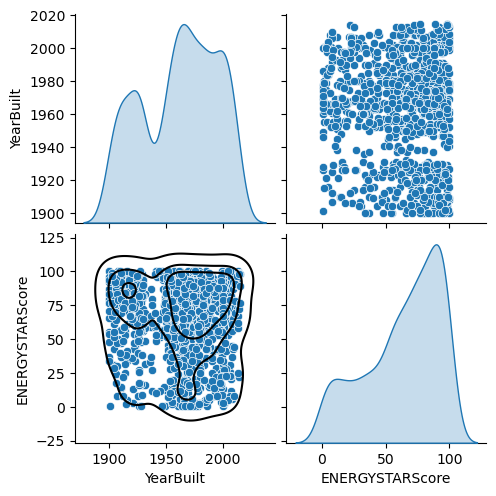

In [42]:
pair_plot(df.loc[:,['YearBuilt','ENERGYSTARScore']])

In [43]:
ind = [i for i in range(1, len(df),len(df)//5)]
year_list = [df.sort_values(by='YearBuilt').iloc[i]['YearBuilt'] for i in ind]
year_list.append(2016)
print(year_list)
year = []
for i in range(len(year_list)-1):
    r = range(year_list[i],year_list[i+1])
    df['YearBuilt'].replace(r,year_list[i], inplace=True)
print(df['YearBuilt'].sort_values().unique().tolist())

[1900, 1926, 1957, 1974, 1995, 2016]
[1900, 1926, 1957, 1974, 1995]


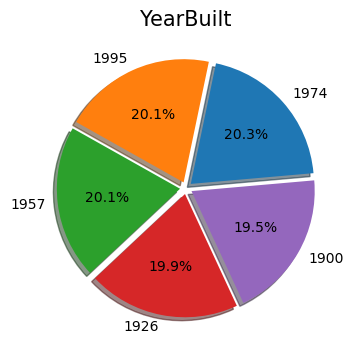

In [44]:
plt.figure(figsize=(4,4))
value_counts = df['YearBuilt'].value_counts()
plt.pie(value_counts.tolist(), 
        labels=value_counts.index,
        explode=[0.05 for i in value_counts.tolist()],
        autopct='%1.1f%%',
        shadow=True,
        startangle=5
       )
plt.title('YearBuilt', fontsize=15)
plt.show()
plt.close('all')

### 5.4 Drop not strucutal features

In [45]:
"""
Drop all not structured features, i keep just 'TotalGHGEmissions','SiteEUIWN(kBtu/sf)'
"""
df.drop( columns = ['SiteEUI(kBtu/sf)', 
                    'SourceEUI(kBtu/sf)', 
                    'SourceEUIWN(kBtu/sf)',
                    'SiteEnergyUse(kBtu)', 
                    'SiteEnergyUseWN(kBtu)', 
                    'SteamUse(kBtu)',
                    'Electricity(kBtu)', 
                    'NaturalGas(therms)', 
                    'NaturalGas(kBtu)', 
                    'GHGEmissionsIntensity'], inplace = True)

## 6. Features analysis

### 6.1 Quantitative features

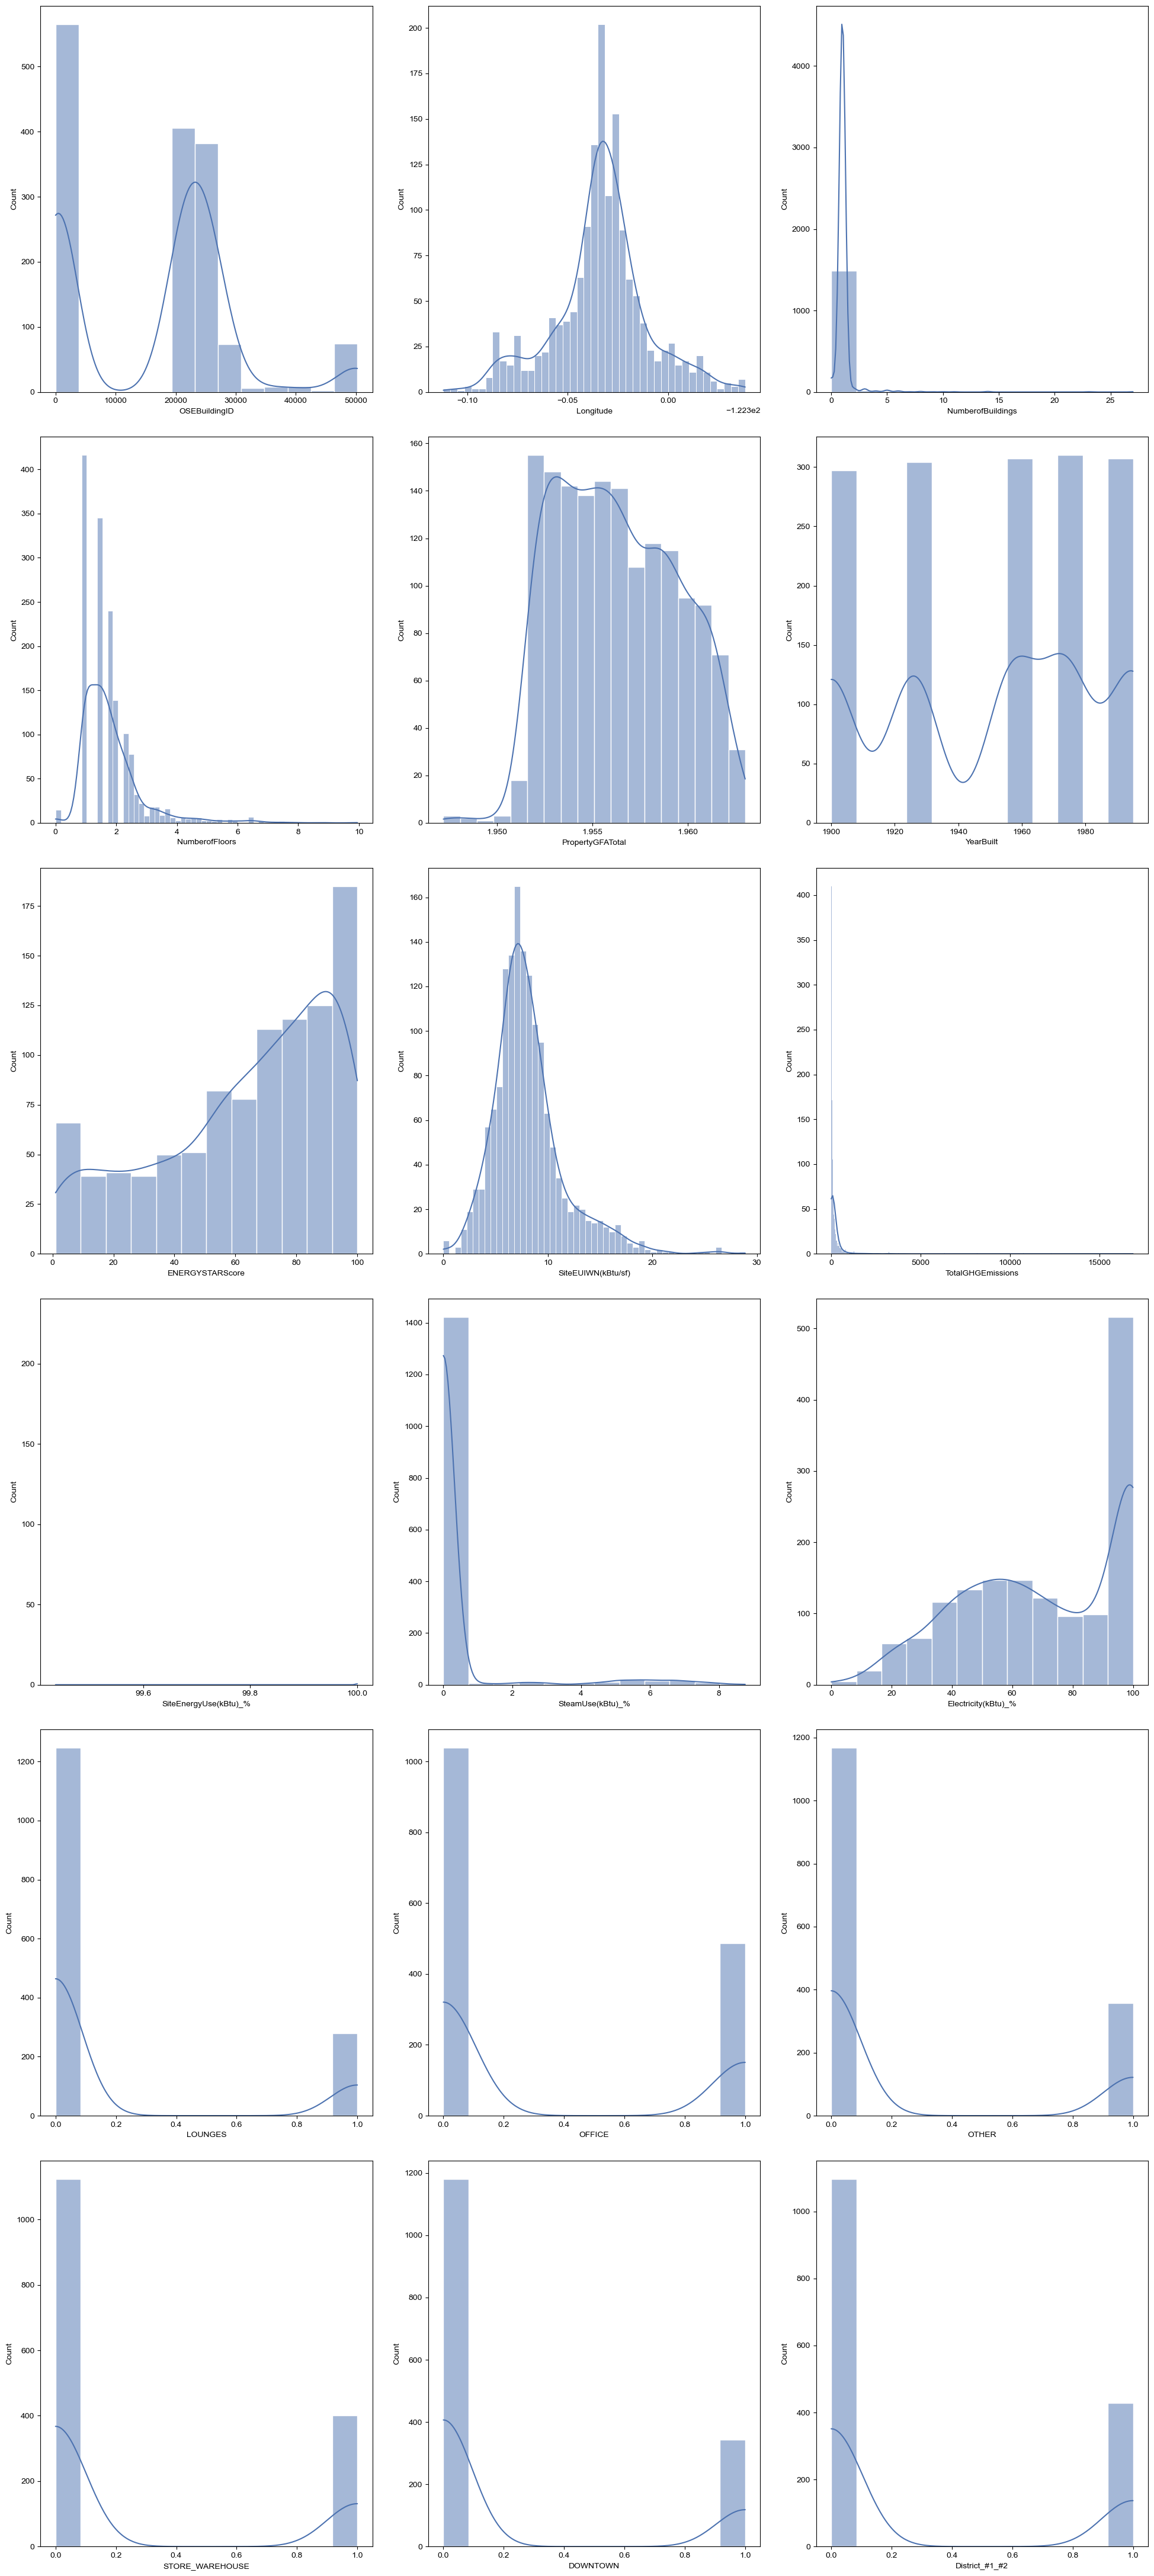

In [65]:
cols = df.select_dtypes(exclude=['object']).columns
plt.close('all')
fig, axes = plt.subplots(6, 3, figsize=(20,44))
axes = axes.ravel()  # flattening the array makes indexing easier
sns.set_theme(font_scale=2)
for col, ax in zip(cols, axes):
    sns.histplot(data=df[col], kde=True, ax=ax)
    
fig.tight_layout()
plt.show()

In [47]:
from scipy.stats import normaltest
"""
This function tests the null hypothesis that a sample comes from a normal distribution.
It is based on D’Agostino and Pearson’s test that combines skew and kurtosis to produce an omnibus test of normality.
"""
norm_test_dic = {}
for i in df.select_dtypes(exclude=['object']).columns:
    norm_test_dic[i] = normaltest(df[i])
pd.DataFrame.from_dict(norm_test_dic, orient='index')

,statistic,pvalue
OSEBuildingID,36.161842,1.404610e-08
Latitude,17.905665,1.293702e-04
Longitude,31.253766,1.634297e-07
NumberofBuildings,2838.688564,0.000000e+00
NumberofFloors,1757.809762,0.000000e+00
PropertyGFATotal,1531.268667,0.000000e+00
YearBuilt,3467.931217,0.000000e+00
ENERGYSTARScore,NaN,NaN
SiteEUIWN(kBtu/sf),1220.927470,7.567781e-266
TotalGHGEmissions,2945.912519,0.000000e+00


In [48]:
from scipy.stats import skewtest
"""
This function tests the null hypothesis that the skewness of the population 
that the sample was drawn from is the same as that of a corresponding normal distribution.
"""
skew_test_dic = {}
for i in df.select_dtypes(exclude=['object']).columns:
    skew_test_dic[i] = skewtest(df[i])
pd.DataFrame.from_dict(skew_test_dic, orient='index')

,statistic,pvalue
OSEBuildingID,4.602405,4.176394e-06
Latitude,4.063533,4.833555e-05
Longitude,-1.901107,5.728799e-02
NumberofBuildings,46.012501,0.000000e+00
NumberofFloors,35.075591,1.588421e-269
PropertyGFATotal,32.737281,4.606531e-235
YearBuilt,-3.591914,3.282581e-04
ENERGYSTARScore,NaN,NaN
SiteEUIWN(kBtu/sf),28.753718,8.138308e-182
TotalGHGEmissions,47.020115,0.000000e+00


In [49]:
from scipy.stats import kurtosistest
"""
This function tests the null hypothesis that the kurtosis of the population 
from which the sample was drawn is that of the normal distribution.
"""
kurtosis_test_dic = {}
for i in df.select_dtypes(exclude=['object']).columns:
    kurtosis_test_dic[i] = kurtosistest(df[i])
pd.DataFrame.from_dict(kurtosis_test_dic, orient='index')

,statistic,pvalue
OSEBuildingID,-3.870363,1.086736e-04
Latitude,-1.180410,2.378373e-01
Longitude,5.257334,1.461589e-07
NumberofBuildings,26.861466,6.196514e-159
NumberofFloors,22.967644,9.819322e-117
PropertyGFATotal,21.436863,6.056084e-102
YearBuilt,-58.779498,0.000000e+00
ENERGYSTARScore,NaN,NaN
SiteEUIWN(kBtu/sf),19.853241,1.033167e-87
TotalGHGEmissions,27.111277,7.250166e-162


In [50]:
df.select_dtypes(include=['object']).columns

Index(['BuildingType', 'PrimaryPropertyType', 'Districts_Neighborhood'], dtype='object')

### 6.2 Qualitative features

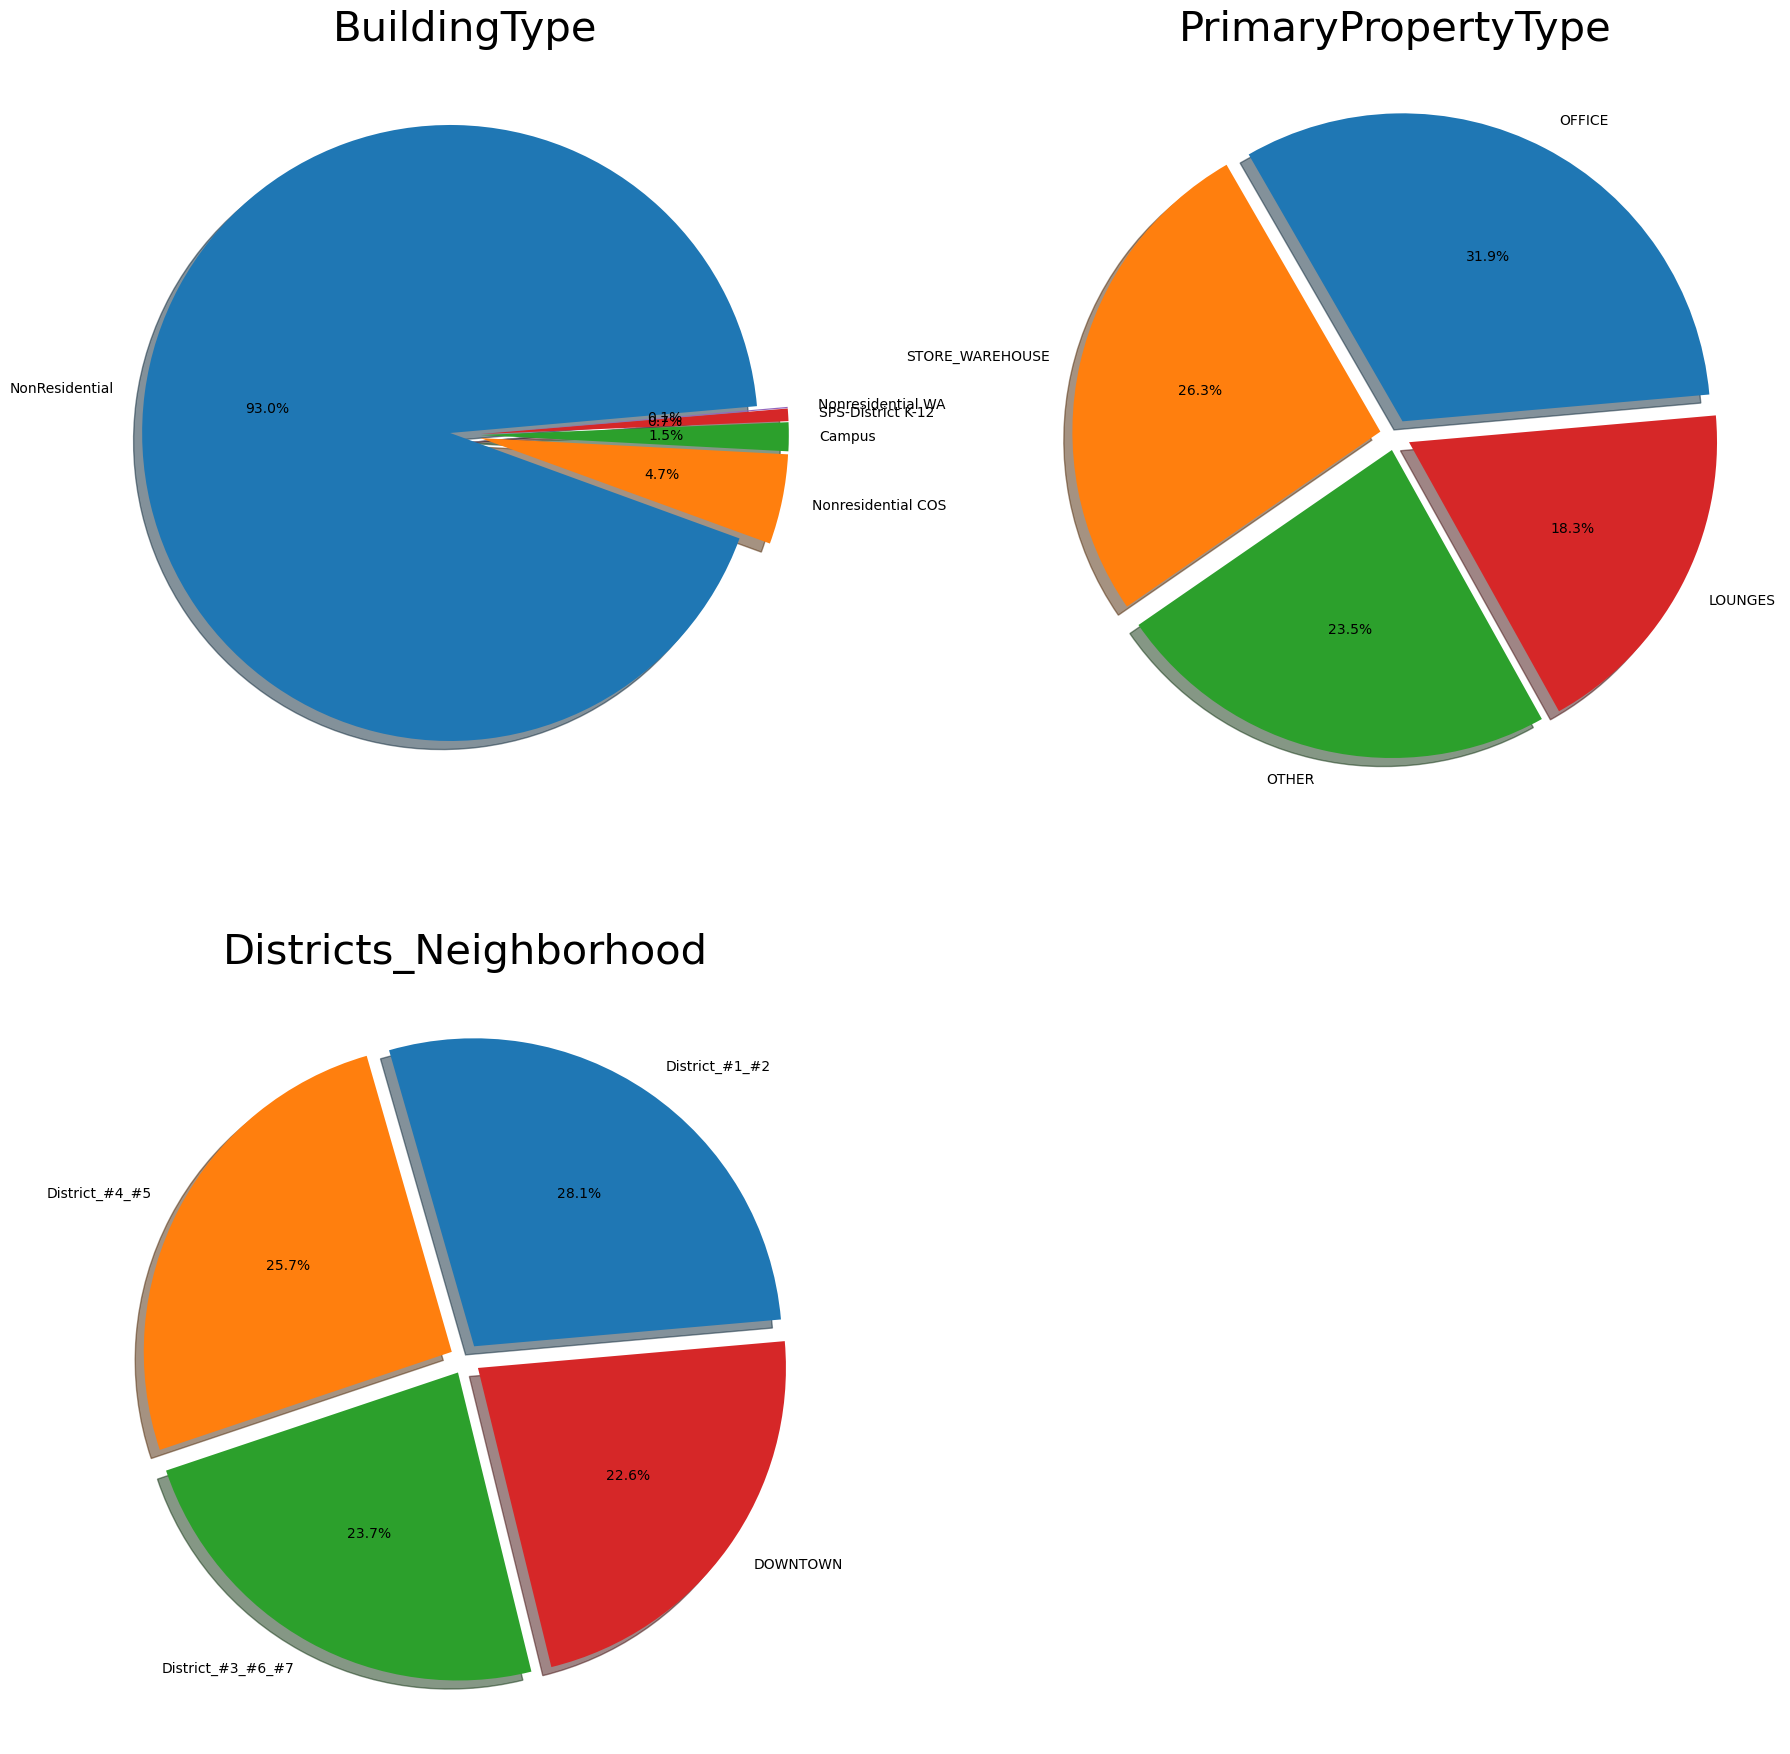

In [51]:
fig = plt.figure(figsize=(22,22))
i=1
for x in df.select_dtypes(include=['object']).columns:
    ax = fig.add_subplot(2,2,i)
    i+=1
    
    value_counts = df[x].value_counts()
    sizes = value_counts.tolist()
    labels = value_counts.index
    explode = [0.05 for i in sizes]
    
    h = ax.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=5)
    ax.set_title(x, fontdict={'fontsize':30})
    
    

In [52]:
print(df.groupby(['BuildingType', 'PrimaryPropertyType']).count()['OSEBuildingID'])
df.drop(columns='BuildingType', inplace=True)

BuildingType        PrimaryPropertyType
Campus              LOUNGES                 11
                    OFFICE                   1
                    OTHER                   11
NonResidential      LOUNGES                259
                    OFFICE                 477
                    OTHER                  291
                    STORE_WAREHOUSE        392
Nonresidential COS  OFFICE                   9
                    OTHER                   54
                    STORE_WAREHOUSE          9
Nonresidential WA   LOUNGES                  1
SPS-District K-12   LOUNGES                  8
                    OTHER                    2
Name: OSEBuildingID, dtype: int64


## 7. Encoding

### 7.1 One hot encoding

In [53]:
for col in df.select_dtypes(include=['object']).columns:
    one_hot = pd.get_dummies(df[col])
    df = df.join(one_hot)

### 7.2 Target encoding

In [54]:
from category_encoders import TargetEncoder

for col in df.select_dtypes(include=['object']).columns:
    te = TargetEncoder()   
    df_col = te.fit_transform(df[col],df[col+'_target'])
    df[col+'_taget_encoded'] = df_col
    df.drop(columns = [col, col+'_target'], inplace=True)
df

,OSEBuildingID,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,YearBuilt,ENERGYSTARScore,SiteEUIWN(kBtu/sf),TotalGHGEmissions,SiteEnergyUse(kBtu)_%,SteamUse(kBtu)_%,Electricity(kBtu)_%,NaturalGas(kBtu)_%,LOUNGES,OFFICE,OTHER,STORE_WAREHOUSE,DOWNTOWN,District_#1_#2,District_#3_#6_#7,District_#4_#5,PrimaryPropertyType_taget_encoded,Districts_Neighborhood_taget_encoded
0,1,47.61220,-122.33799,1.0,12,88434,1926,60.0,84.300003,249.98,99.999993,27.730162,54.605993,17.663838,1,0,0,0,1,0,0,0,51.315412,344.000000
1,2,47.61317,-122.33393,1.0,11,103566,1995,61.0,97.900002,295.86,100.000000,0.000000,38.660907,61.339093,1,0,0,0,1,0,0,0,51.315412,344.000000
2,3,47.61393,-122.33810,1.0,41,956110,1957,43.0,97.699997,2089.28,99.999992,29.711308,68.230741,2.057944,1,0,0,0,1,0,0,0,51.315412,344.000000
3,5,47.61412,-122.33664,1.0,10,61320,1926,56.0,113.300003,286.43,99.999989,32.591344,40.751928,26.656717,1,0,0,0,1,0,0,0,51.315412,344.000000
4,8,47.61375,-122.34047,1.0,18,175580,1974,75.0,118.699997,505.01,99.999993,0.000000,37.880168,62.119825,1,0,0,0,1,0,0,0,51.315412,344.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,50221,47.54067,-122.37441,1.0,1,18261,1974,NaN,56.200001,20.33,99.999987,0.000000,67.844023,32.155964,0,0,1,0,0,1,0,0,190.893855,256.355140
3372,50223,47.59625,-122.32283,1.0,1,16000,1995,NaN,65.900002,32.17,99.999984,0.000000,41.729558,58.270426,0,0,1,0,1,0,0,0,190.893855,344.000000
3373,50224,47.63644,-122.35784,1.0,1,13157,1974,NaN,460.100006,223.54,99.999997,0.000000,31.082041,68.917956,0,0,1,0,0,0,1,0,190.893855,105.869806
3374,50225,47.52832,-122.32431,1.0,1,14101,1974,NaN,55.500000,22.11,99.999999,0.000000,48.489805,51.510194,0,0,1,0,0,1,0,0,190.893855,256.355140


## 8. Skew

### 8.1 Log - square root - cube root

In [55]:
skew_data = pd.DataFrame()
columns_num = df.select_dtypes(exclude=['object']).columns
skew_data['Columns']= (columns_num)
skew_data['Original_skew'] = list(df[columns_num].skew())

# Log
skew_data['Log_skew'] = list(np.log(df[columns_num]).skew())

# Square
skew_data['SquareRoot_skew'] = list(np.sqrt(df[columns_num]).skew())

#Cube
skew_data['CubeRoot_skew'] = list(np.cbrt(df[columns_num]).skew())

### 8.2 Boxcox

In [56]:
##### from scipy import stats
l = []
for col in columns_num:
    if (df[col]<=0).sum() in (0,len(df[col])):
        box_cox = pd.Series(stats.boxcox(df[col].abs())[0])
        if not all(x == box_cox[0] for x in box_cox):
            l.append(box_cox.skew())    
        else:
            l.append(np.nan)
    else:
        l.append(np.nan)
        
skew_data['Boxcox_skew'] = l
skew_data
              

,Columns,Original_skew,Log_skew,SquareRoot_skew,CubeRoot_skew,Boxcox_skew
0,OSEBuildingID,0.293455,-0.827404,-0.331499,-0.452405,-0.448429
1,Latitude,0.257946,0.255293,0.256619,0.256177,NaN
2,Longitude,-0.119200,NaN,NaN,-0.118645,NaN
3,NumberofBuildings,13.510621,NaN,4.093332,-0.769598,NaN
4,NumberofFloors,5.867909,NaN,2.609776,1.592276,NaN
5,PropertyGFATotal,4.903511,1.034078,2.505290,1.913537,0.175036
6,YearBuilt,-0.227224,-0.244204,-0.235721,-0.238551,-0.075698
7,ENERGYSTARScore,-0.667878,-2.407296,-1.260024,-1.556984,1.358086
8,SiteEUIWN(kBtu/sf),3.603128,NaN,1.395261,0.665306,NaN
9,TotalGHGEmissions,14.586217,0.047308,4.734000,2.460896,-0.001522


### 8.3 Skew transform

In [57]:
for i in range(len(skew_data)):
    if skew_data.loc[i,'Log_skew'] == min(skew_data.iloc[i,1:6].abs()):
        col = skew_data.iloc[i,0]
        df[col] = np.log(df[col])
        
    elif skew_data.loc[i,'SquareRoot_skew'] == min(skew_data.iloc[i,1:6].abs()):
        col = skew_data.iloc[i,0]
        df[col] = np.sqrt(df[col])
        
    elif skew_data.loc[i,'CubeRoot_skew'] == min(skew_data.iloc[i,1:6].abs()):
        col = skew_data.iloc[i,0]
        df[col] = np.sqrt(df[col])
        
    elif skew_data.loc[i,'Boxcox_skew'] == min(skew_data.iloc[i,1:6].abs()):
        col = skew_data.iloc[i,0]
        df[col] = pd.Series(stats.boxcox(df[col].abs())[0]).tolist()
        
        
        

In [58]:
df.columns

Index(['OSEBuildingID', 'Latitude', 'Longitude', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'YearBuilt', 'ENERGYSTARScore',
       'SiteEUIWN(kBtu/sf)', 'TotalGHGEmissions', 'SiteEnergyUse(kBtu)_%',
       'SteamUse(kBtu)_%', 'Electricity(kBtu)_%', 'NaturalGas(kBtu)_%',
       'LOUNGES', 'OFFICE', 'OTHER', 'STORE_WAREHOUSE', 'DOWNTOWN',
       'District_#1_#2', 'District_#3_#6_#7', 'District_#4_#5',
       'PrimaryPropertyType_taget_encoded',
       'Districts_Neighborhood_taget_encoded'],
      dtype='object')

## 9.Correlation

### 9.1 Pearson correlation matrix

In [59]:
pearson_corr = df.corr().abs()
triu_sup = np.triu(np.ones(pearson_corr.shape),k=1).astype(np.bool)
pearson_corr = pearson_corr.where(triu_sup)
pearson_corr = pearson_corr.stack().reset_index()
pearson_corr.columns = ['Row','Column','Pearson_Correlation']

pearson_corr.loc[pearson_corr['Pearson_Correlation']>=0.70]

,Row,Column,Pearson_Correlation
40,Latitude,District_#1_#2,0.728156
210,Electricity(kBtu)_%,NaturalGas(kBtu)_%,0.940045
238,LOUNGES,PrimaryPropertyType_taget_encoded,0.769034
246,OFFICE,PrimaryPropertyType_taget_encoded,0.713638


In [60]:
# I save 'SiteEUIWN(kBtu/sf)'
df.drop(columns=['PrimaryPropertyType_taget_encoded','NaturalGas(kBtu)_%', 'Latitude'], inplace=True)




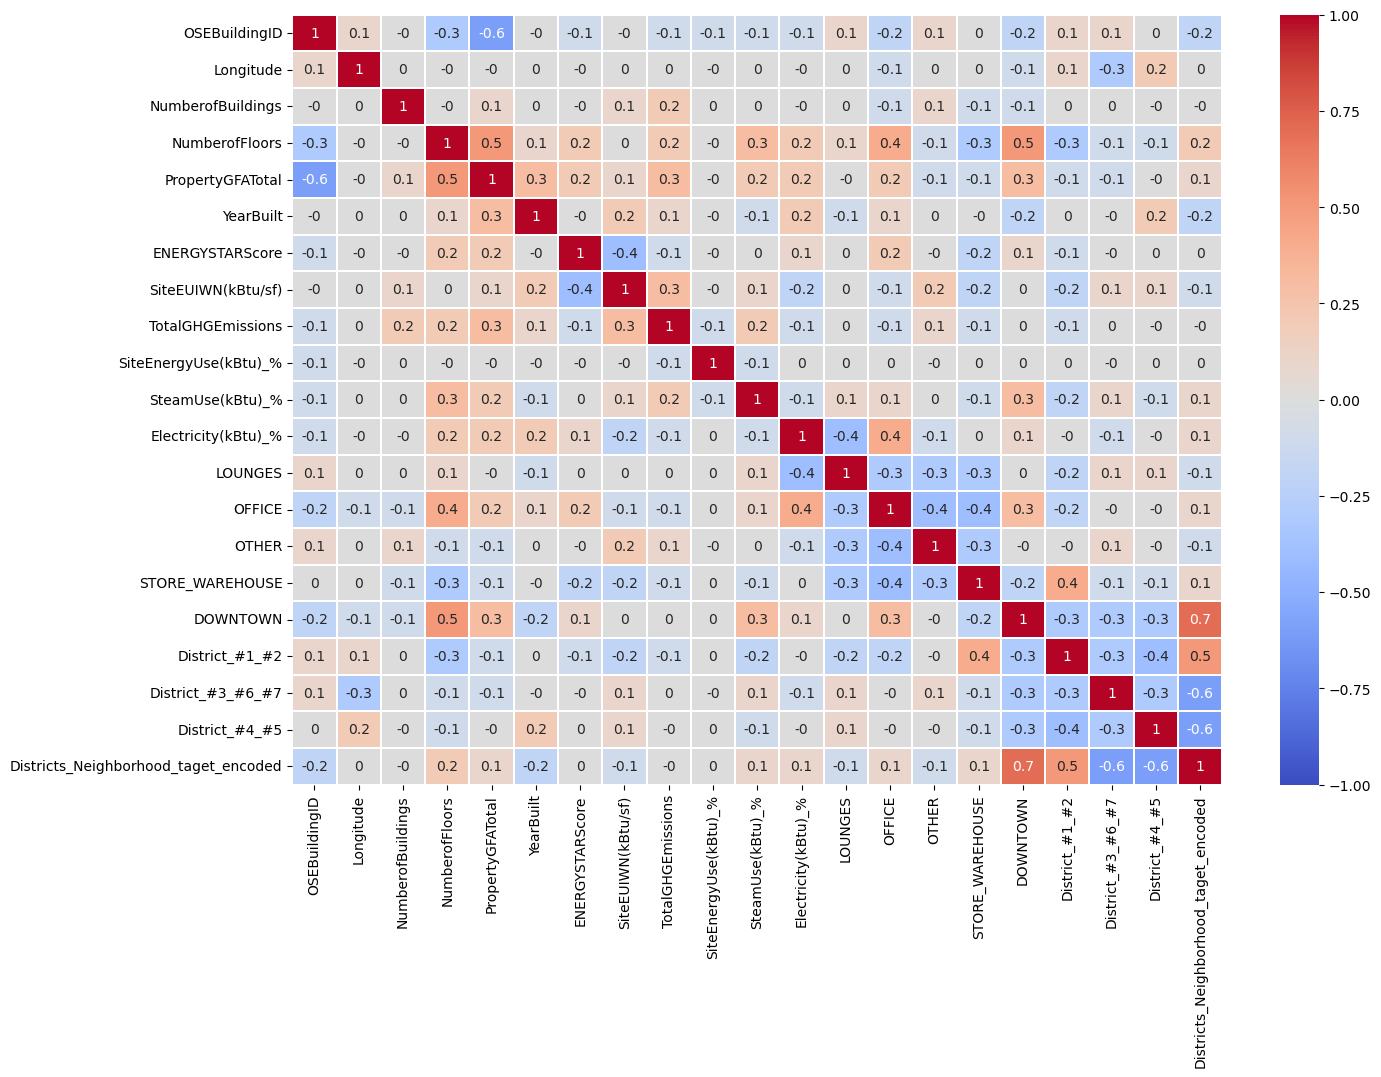

In [61]:
plt.figure(figsize=(15,10))
sns.heatmap(round(df.corr(),1), vmin=-1, vmax=1, linewidths=0.004, center=0, cmap="coolwarm", annot=True)
plt.show()
plt.close('all')

### 9.2 Cramer's V correlation matrix

In [62]:
data_PrimaryPropertyType = df[['OFFICE', 
                               'OTHER',
                               'LOUNGES',
                               'STORE_WAREHOUSE']]
data_Neighborhood = df[['DOWNTOWN', 
                        'District_#1_#2', 
                        'District_#3_#6_#7',
                        'District_#4_#5']]

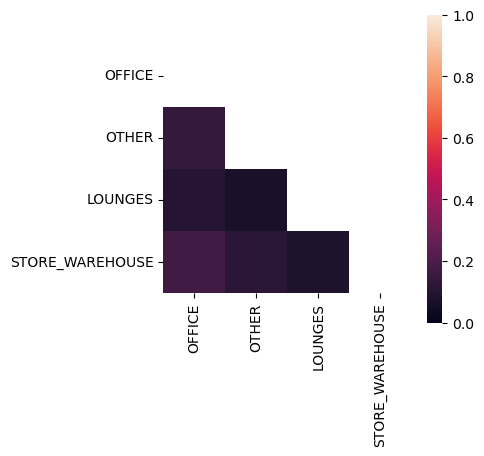

,OFFICE,OTHER,LOUNGES,STORE_WAREHOUSE
OFFICE,1.00,0.14,0.10,0.17
OTHER,0.14,1.00,0.07,0.11
LOUNGES,0.10,0.07,1.00,0.08
STORE_WAREHOUSE,0.17,0.11,0.08,1.00


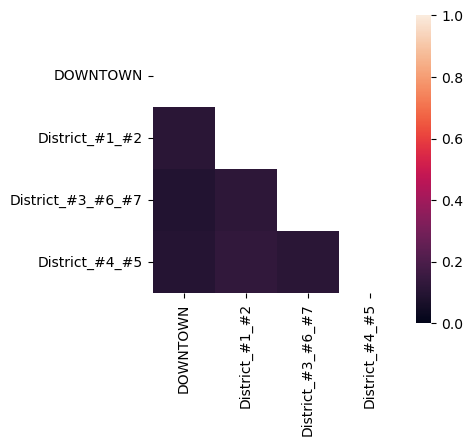

,DOWNTOWN,District_#1_#2,District_#3_#6_#7,District_#4_#5
DOWNTOWN,1.00,0.11,0.09,0.10
District_#1_#2,0.11,1.00,0.12,0.13
District_#3_#6_#7,0.09,0.12,1.00,0.11
District_#4_#5,0.10,0.13,0.11,1.00


In [63]:
cramersV_PrimaryPropertyType = cramersV_matrix(data_PrimaryPropertyType)
display(cramersV_PrimaryPropertyType)
cramersV_Neighborhood = cramersV_matrix(data_Neighborhood)
display(cramersV_Neighborhood)

## 10. Save DataFrame

In [64]:
df.to_csv('df_clean.csv', index=False)